## Baseline Scenario

Keep a running average for throughput (sensors and users) and a running average for age-of-info. 
- If the age-of-info is larger than threshold double the sensor BW and CPU. 
- If the throughput is less than threshold double BW/CPU for users.


In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


Time 99: Doubling Sensor BW and CPU due to high AoI (0.00)


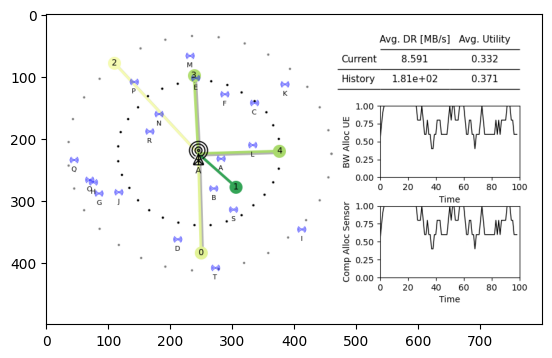

In [3]:
from IPython import display

# Parameters
aori_threshold = 20.0
throughput_threshold = 25.0

running_avg_aori = 0.0
running_avg_throughput_ue = 0.0

aori_alpha = 0.1
throughput_alpha = 0.1

dummy_action = [0.50, 0.50]
delta_change = 0.2

done = False
obs, info = env.reset()

for t in range(100):
    obs, reward, terminated, truncated, info = env.step(tuple(dummy_action))

    # Get metrics from the environment
    _, kpi_results, _, _, _ = env.monitor.load_results()
    current_aori = kpi_results["total aori"].iloc[-1]
    current_throughput_ue = kpi_results['total throughput ue'].iloc[-1]

    # Adjust resources based on thresholds
    if current_aori > aori_threshold:
        print(f"Time {t}: Doubling Sensor BW and CPU due to high AoI ({running_avg_aori:.2f})")
        dummy_action[0] = max(0, dummy_action[0] - delta_change)
        dummy_action[1] = max(0, dummy_action[1] - delta_change)

    if current_throughput_ue < throughput_threshold:
        print(f"Time {t}: Doubling User BW and CPU due to low throughput ({running_avg_throughput_ue:.2f})")
        dummy_action[0] = min(1, dummy_action[0] + delta_change)
        dummy_action[1] = min(1, dummy_action[1] + delta_change)

    if terminated or truncated:
        break

    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [4]:
scalar_results, kpi_results, ue_results, bs_results, ss_results = env.monitor.load_results()

scalar_results

,number UE connections,number sensor conncections,total traffic request ue,total traffic request sensor,delayed UE packets,delayed sensor packets,reward,cumulative reward,mean utility,mean utility sensor,mean datarate,mean datarate sensor
Time Step,,,,,,,,,,,,
0,5,20,13.0,97.0,0,0,0.00,0.00,0.039419,0.042077,1.765301,6.335192e+00
1,5,20,29.0,90.0,0,0,0.00,0.00,0.119098,-0.068847,2.508997,3.801115e+00
2,5,20,27.0,111.0,0,0,9.50,9.50,0.178174,-0.307408,3.168328,1.267038e+00
3,5,20,72.0,96.0,0,0,10.00,19.50,0.205555,-1.000000,3.536078,1.000000e-10
4,5,20,66.0,93.0,0,0,0.00,19.50,0.211186,-1.000000,3.518171,1.000000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,20,51.0,107.0,1,3,7.94,203.34,0.413298,-0.156893,15.429715,2.534077e+00
96,5,20,58.0,108.0,0,7,13.62,216.96,0.342464,-0.006378,9.911487,5.068154e+00
97,5,20,65.0,104.0,2,8,-2.65,214.31,0.336518,-0.006378,9.021049,5.068154e+00


In [5]:
kpi_results

,bw allocation UE,bw allocation sensor,comp. allocation UE,comp. allocation sensor,reward,reward cumulative,total aori,total aosi,total delayed packets,total throughput ue,total throughput sensor
Time Step,,,,,,,,,,,
0,0.5,0.5,0.5,0.5,0.00,0.00,0.0,0.0,0,1.005519,29.081691
1,0.7,0.3,0.7,0.3,0.00,0.00,0.0,0.0,0,8.673528,21.727761
2,0.9,0.1,0.9,0.1,9.50,9.50,1.0,1.0,0,10.625693,14.281345
3,1.0,0.0,1.0,0.0,10.00,19.50,1.0,0.0,0,12.789358,0.000000
4,1.0,0.0,1.0,0.0,0.00,19.50,0.0,0.0,0,9.621442,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
95,0.8,0.2,0.8,0.2,7.94,203.34,32.0,39.0,1,31.025609,20.562691
96,0.6,0.4,0.6,0.4,13.62,216.96,1.0,15.0,0,29.253345,32.125382
97,0.6,0.4,0.6,0.4,-2.65,214.31,103.0,97.0,2,22.261068,35.125382


In [6]:
ue_results

Metric           AoRI  AoSI  distance UE-station  traffic request  \
Time Step UE ID                                                     
0         0       NaN   NaN            58.457556              0.0   
          1       NaN   NaN           110.874807              0.0   
          2       NaN   NaN           122.207981              0.0   
          3       NaN   NaN            94.300447             13.0   
          4       NaN   NaN            75.313075              0.0   
...               ...   ...                  ...              ...   
99        0       NaN   NaN            79.815138              9.0   
          1       0.0   3.0            38.566752             14.0   
          2       NaN   NaN            94.049429             11.0   
          3       NaN   NaN            63.562995             12.0   
          4      33.0  30.0            58.535843             10.0   

Metric           user datarate  user queue size  user throughput  user utility  
Time Step UE ID                                                                 
0         0           4.757415              0.0         0.000000      0.338686  
          1           0.586876              0.0         0.000000     -0.115727  
          2           0.431710              0.0         0.000000     -0.182404  
          3           1.005519              1.0         1.005519      0.001195  
          4           2.044987              0.0         0.000000      0.155345  
...                        ...              ...              ...           ...  
99        0           2.091112             45.0         2.091112      0.160189  
          1          25.446119              0.0        14.000000      0.702811  
          2           1.192963             54.0         1.192963      0.038314  
          3           4.672554              3.0         4.672554      0.334777  
          4           6.189091             26.0         6.189091      0.395813  

[500 rows x 8 columns]

In [7]:
ss_results

Metric               distance sensor-station  sensor datarate  \
Time Step Sensor ID                                             
0         0                        16.492423        90.297113   
          1                        30.083218        11.860458   
          2                        57.280014         1.347652   
          3                        70.611614         0.664789   
          4                        61.032778         1.087684   
...                                      ...              ...   
99        15                       74.027022         0.453413   
          16                       89.140339         0.242109   
          17                       39.357337         3.828872   
          18                       51.478151         1.546329   
          19                       92.779308         0.211507   

Metric               sensor queue size  sensor throughput  sensor utility  \
Time Step Sensor ID                                                         
0         0                        0.0           5.000000        0.977837   
          1                        0.0           4.000000        0.537051   
          2                        1.0           1.347652        0.064789   
          3                        1.0           0.664789       -0.088658   
          4                        1.0           1.087684        0.018251   
...                                ...                ...             ...   
99        15                      94.0           0.453413       -0.171753   
          16                      98.0           0.242109       -0.307995   
          17                      61.0           3.828872        0.291535   
          18                      82.0           1.546329        0.094651   
          19                      98.0           0.211507       -0.337337   

Metric               traffic request  
Time Step Sensor ID                   
0         0                      5.0  
          1                      4.0  
          2                      9.0  
          3                      4.0  
          4                      5.0  
...                              ...  
99        15                     9.0  
          16                     4.0  
          17                     2.0  
          18                     6.0  
          19                     1.0  

[2000 rows x 6 columns]

In [8]:
bs_results

,Metric,queue size accomplished UE jobs,queue size accomplished sensor jobs,queue size transferred UE jobs,queue size transferred sensor jobs
Time Step,BS ID,,,,
0,0,0,4,0,0
1,0,0,6,0,0
2,0,1,8,0,0
3,0,2,8,0,0
4,0,2,8,0,0
...,...,...,...,...,...
95,0,212,337,0,25
96,0,214,344,0,23
97,0,217,352,0,22


In [9]:
data = kpi_results.agg(['min', 'max', 'mean'])
data

,bw allocation UE,bw allocation sensor,comp. allocation UE,comp. allocation sensor,reward,reward cumulative,total aori,total aosi,total delayed packets,total throughput ue,total throughput sensor
min,0.400,0.000,0.400,0.000,-20.0000,-123.4900,0.00,0.00,0.00,1.005519,0.000000
max,1.000,0.600,1.000,0.600,18.0500,216.9600,103.00,104.00,4.00,36.319867,54.688073
mean,0.793,0.207,0.793,0.207,2.1286,31.3766,23.93,29.92,1.08,22.068320,20.347972


In [10]:
data = scalar_results.agg(['min', 'max', 'mean'])
data

,number UE connections,number sensor conncections,total traffic request ue,total traffic request sensor,delayed UE packets,delayed sensor packets,reward,cumulative reward,mean utility,mean utility sensor,mean datarate,mean datarate sensor
min,5.0,20.0,13.00,81.0,0.00,0.00,-20.0000,-123.4900,0.039419,-1.000000,1.765301,1.000000e-10
max,5.0,20.0,72.00,133.0,4.00,13.00,18.0500,216.9600,0.550075,0.080796,2539.978572,7.602230e+00
mean,5.0,20.0,49.23,101.7,1.08,3.28,2.1286,31.3766,0.370115,-0.403751,179.443353,2.622769e+00


In [11]:
data = ue_results.reset_index()
data = data.groupby('UE ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric       AoRI                  AoSI            distance UE-station  \
             mean  min   max       mean  min   max                mean   
UE ID                                                                    
0       18.958333  1.0  61.0  20.000000  0.0  57.0           86.195208   
1        3.966102  0.0  17.0  10.898305  0.0  62.0           47.532582   
2       41.260870  9.0  71.0  30.608696  0.0  65.0           89.953579   
3        3.268657  0.0  20.0   8.641791  0.0  52.0           49.517584   
4       13.743590  2.0  33.0  15.025641  1.0  32.0           72.798475   

Metric                        traffic request  ... user datarate  \
              min         max            mean  ...           max   
UE ID                                          ...                 
0       58.457556   99.946785            9.69  ...      8.526813   
1        7.323860  110.874807            9.98  ...  12612.388631   
2       77.179383  122.207981            9.87  ...      3.969564   
3       26.206380   94.300447            9.87  ...    165.920632   
4       58.535843   92.039596            9.82  ...      7.382067   

Metric user queue size            user throughput                  \
                  mean  min   max            mean  min        max   
UE ID                                                               
0                18.39  0.0  45.0        2.260616  0.0   7.788910   
1                 2.34  0.0   9.0        6.420000  0.0  22.000000   
2                28.77  0.0  54.0        2.056132  0.0   3.969564   
3                 2.25  0.0   9.0        7.185663  0.0  19.771211   
4                 9.98  0.0  26.0        4.145909  0.0   7.382067   

Metric user utility                      
               mean       min       max  
UE ID                                    
0          0.160590 -0.097810  0.465393  
1          0.639640 -0.115727  1.000000  
2          0.139781 -0.182404  0.299371  
3          0.621338  0.001195  1.000000  
4          0.289226 -0.007426  0.434089  

[5 rows x 24 columns]

In [12]:
data = ss_results.reset_index()
data = data.groupby('Sensor ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric    distance sensor-station                       sensor datarate       \
                             mean        min        max            mean  min   
Sensor ID                                                                      
0                       16.492423  16.492423  16.492423       37.383005  0.0   
1                       30.083218  30.083218  30.083218        4.910230  0.0   
2                       57.280014  57.280014  57.280014        0.557928  0.0   
3                       70.611614  70.611614  70.611614        0.275223  0.0   
4                       61.032778  61.032778  61.032778        0.450301  0.0   
5                       51.623638  51.623638  51.623638        0.792634  0.0   
6                       77.878110  77.878110  77.878110        0.197707  0.0   
7                       78.447435  78.447435  78.447435        0.192903  0.0   
8                       95.900991  95.900991  95.900991        0.097881  0.0   
9                       64.884513  64.884513  64.884513        0.366222  0.0   
10                      83.546394  83.546394  83.546394        0.155947  0.0   
11                      39.623226  39.623226  39.623226        1.936894  0.0   
12                      79.227520  79.227520  79.227520        0.186563  0.0   
13                      42.520583  42.520583  42.520583        1.526151  0.0   
14                      80.777472  80.777472  80.777472        0.174747  0.0   
15                      74.027022  74.027022  74.027022        0.234641  0.0   
16                      89.140339  89.140339  89.140339        0.125291  0.0   
17                      39.357337  39.357337  39.357337        1.981441  0.0   
18                      51.478151  51.478151  51.478151        0.800225  0.0   
19                      92.779308  92.779308  92.779308        0.109455  0.0   

Metric                sensor queue size            sensor throughput       \
                  max              mean  min   max              mean  min   
Sensor ID                                                                   
0          108.356536              3.71  0.0  24.0          5.430000  0.0   
1           14.232550             11.31  0.0  25.0          4.800462  0.0   
2            1.617183             46.62  1.0  90.0          0.557928  0.0   
3            0.797747             48.83  1.0  96.0          0.275223  0.0   
4            1.305221             47.34  1.0  91.0          0.450301  0.0   
5            2.297491             45.80  1.0  87.0          0.792634  0.0   
6            0.573063             49.15  1.0  97.0          0.197707  0.0   
7            0.559139             49.50  1.0  97.0          0.192903  0.0   
8            0.283714             49.49  1.0  97.0          0.097881  0.0   
9            1.061514             48.22  1.0  94.0          0.366222  0.0   
10           0.452020             49.57  1.0  97.0          0.155947  0.0   
11           5.614186             35.73  0.0  62.0          1.920109  0.0   
12           0.540763             49.72  1.0  98.0          0.186563  0.0   
13           4.423627             39.81  1.0  71.0          1.526151  0.0   
14           0.506513             49.29  1.0  96.0          0.174747  0.0   
15           0.680120             48.18  1.0  94.0          0.234641  0.0   
16           0.363163             49.96  1.0  98.0          0.125291  0.0   
17           5.743307             35.01  0.0  61.0          1.953580  0.0   
18           2.319493             43.47  1.0  82.0          0.800225  0.0   
19           0.317261             50.13  1.0  98.0          0.109455  0.0   

Metric               sensor utility                traffic request             
                 max           mean  min       max            mean  min   max  
Sensor ID                                                                      
0          36.118845       0.194639 -1.0  1.000000            5.43  1.0  11.0  
1          14.232550      -0.086942 -1.0  0.576641            5.04 

In [13]:
data = bs_results.reset_index()
data = data.groupby('BS ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric queue size accomplished UE jobs           \
                                  mean min  max   
BS ID                                             
0                               107.08   0  220   

Metric queue size accomplished sensor jobs           \
                                      mean min  max   
BS ID                                                 
0                                   144.56   4  366   

Metric queue size transferred UE jobs          \
                                 mean min max   
BS ID                                           
0                                0.01   0   1   

Metric queue size transferred sensor jobs          
                                     mean min max  
BS ID                                              
0                                    14.6   0  30

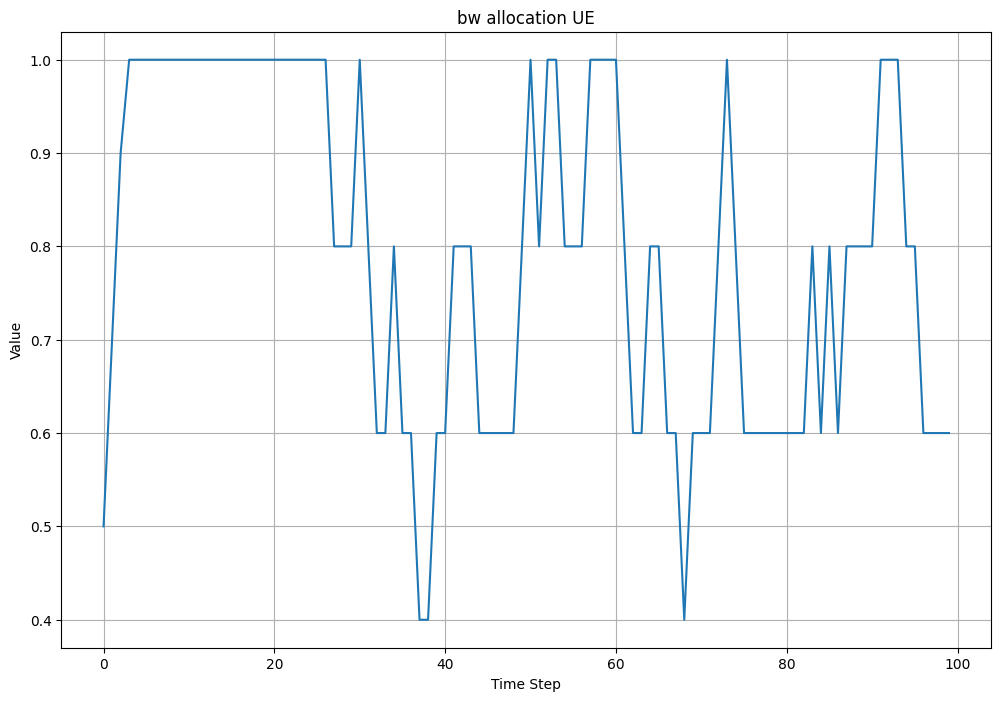

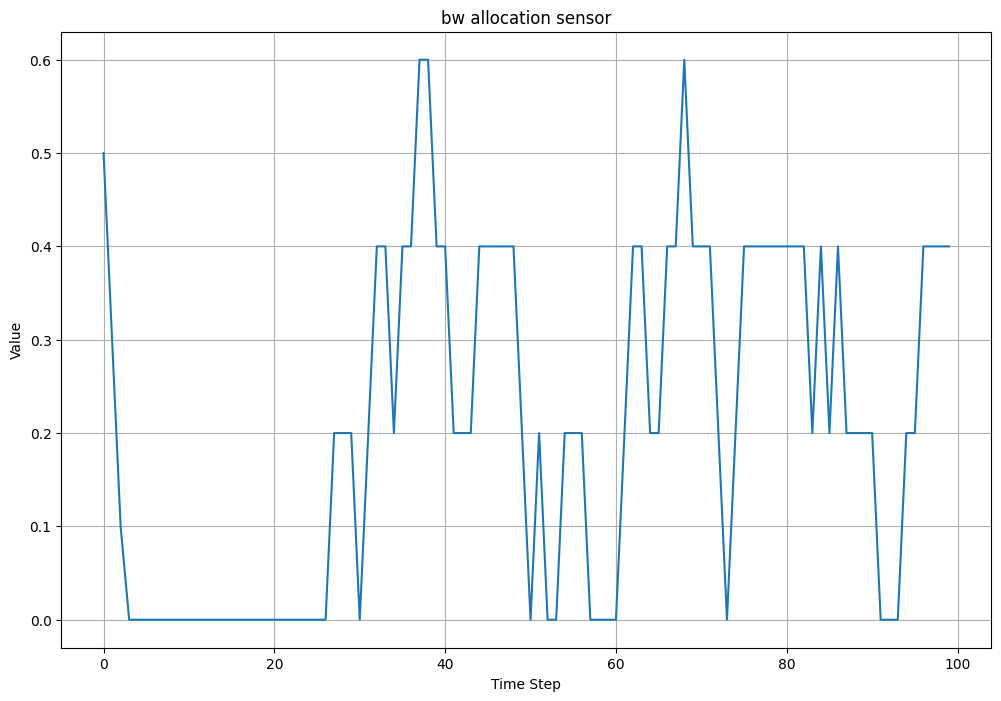

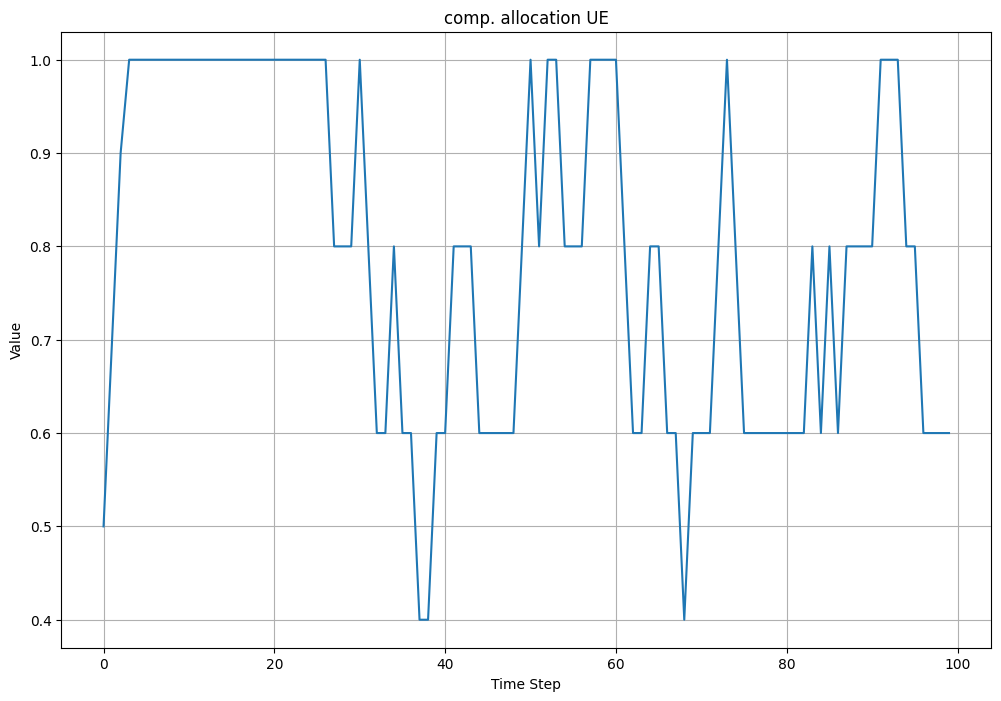

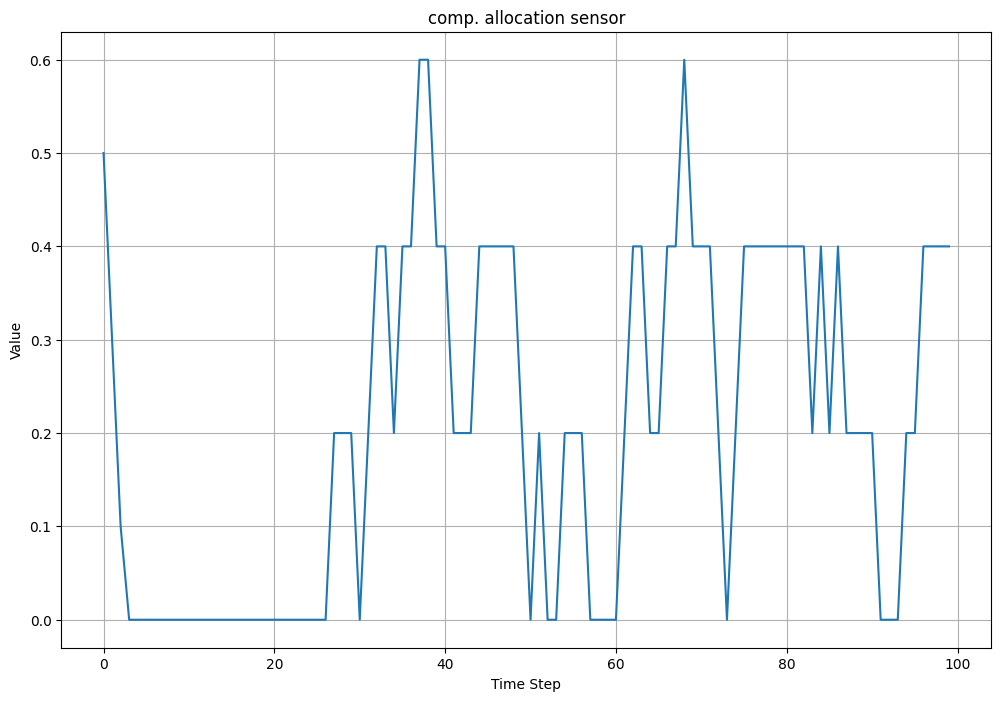

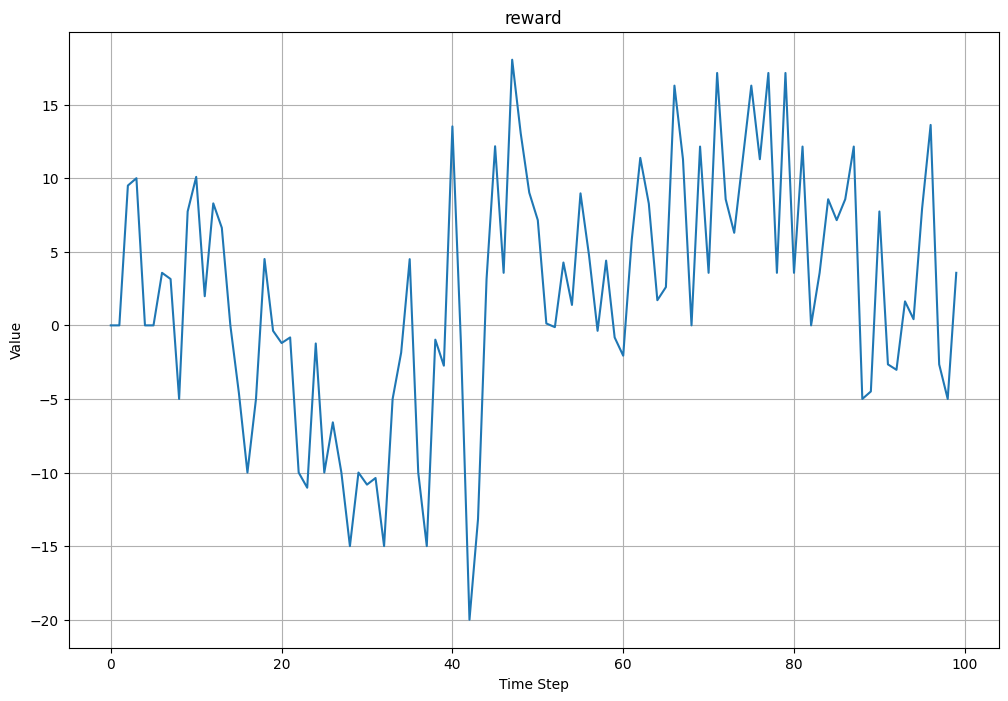

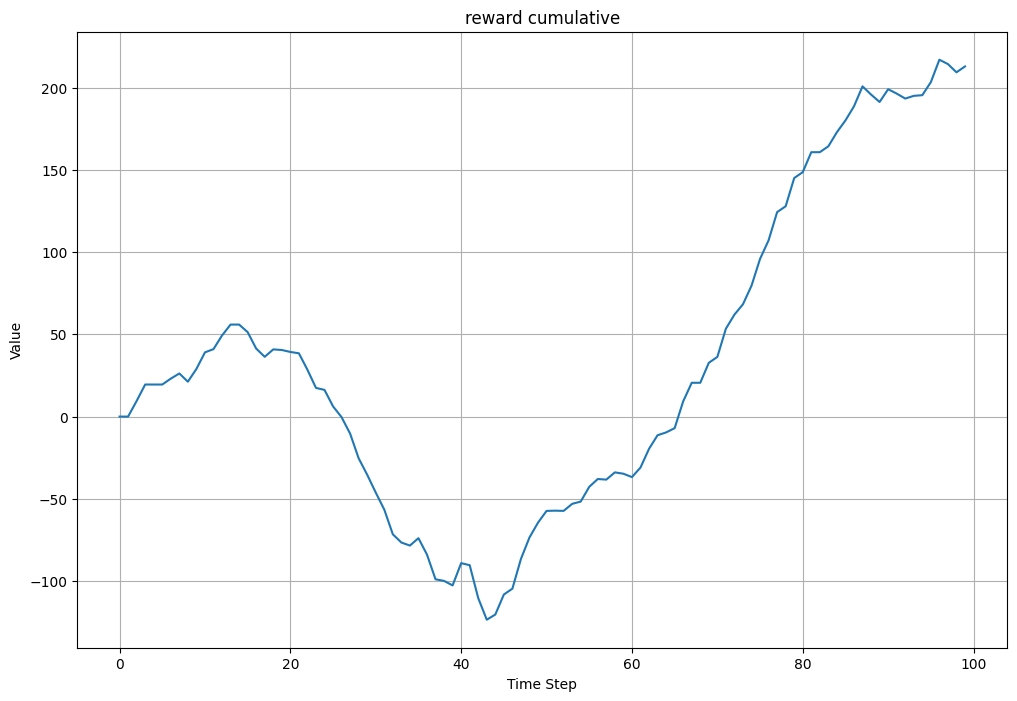

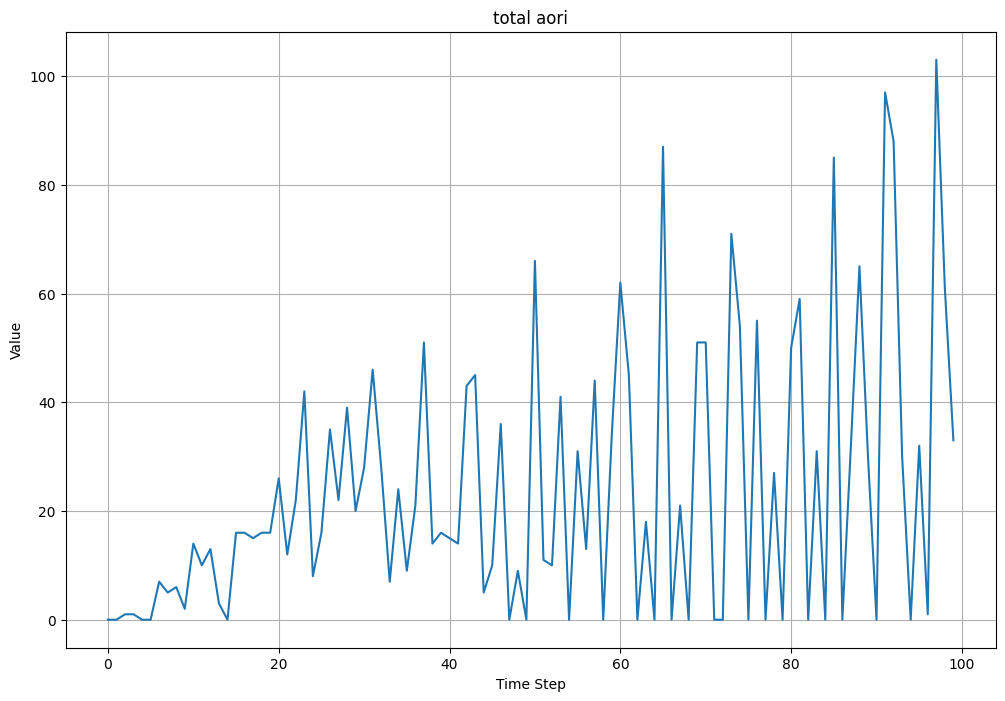

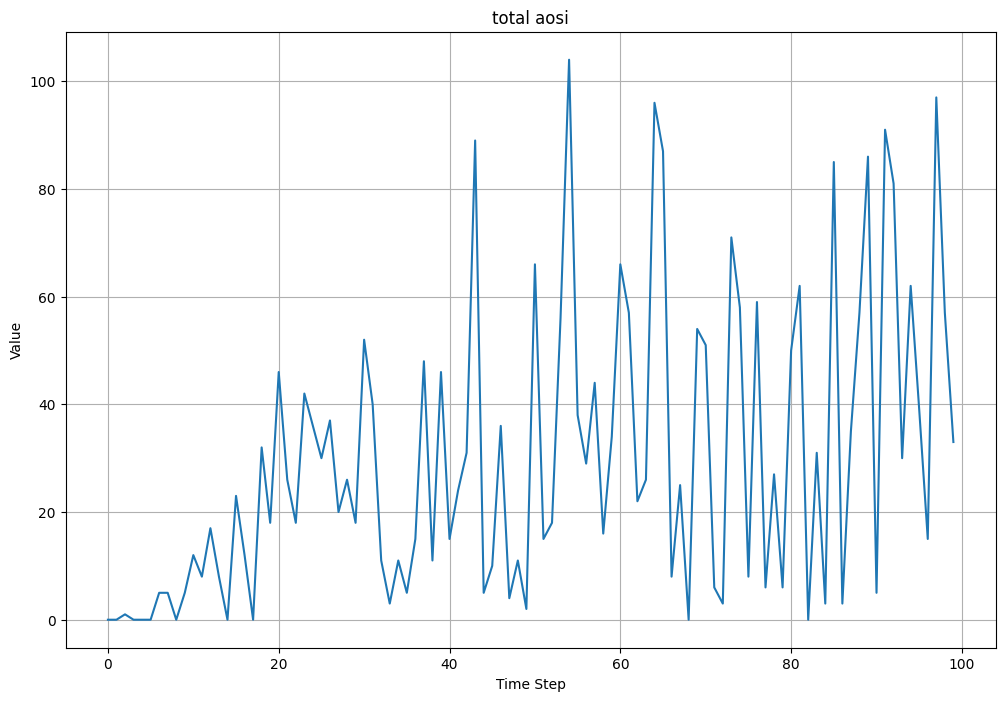

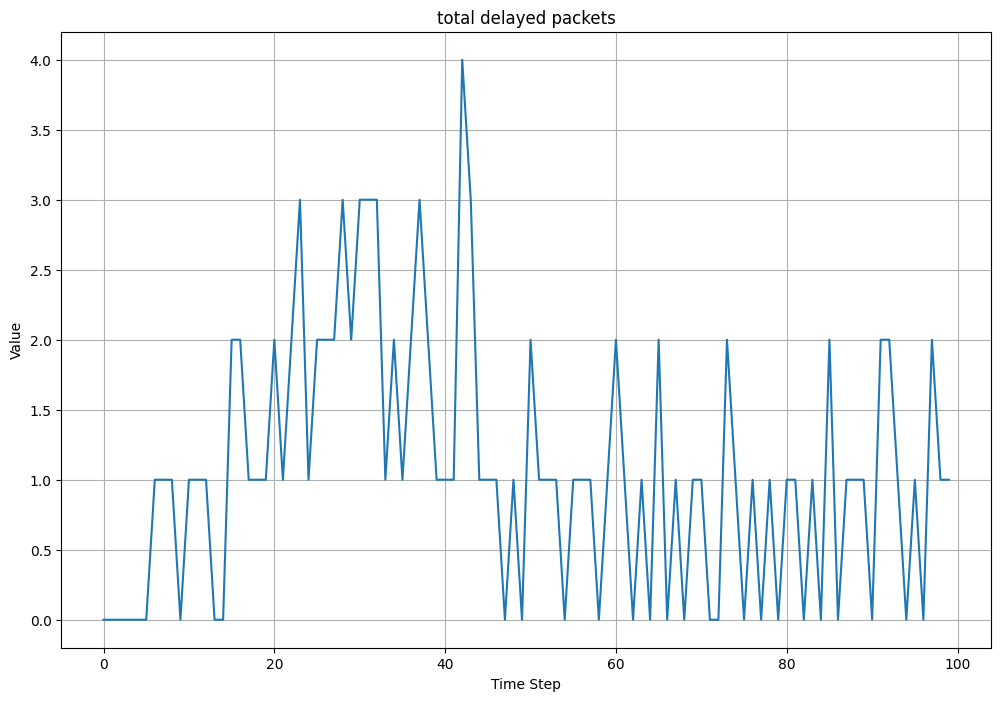

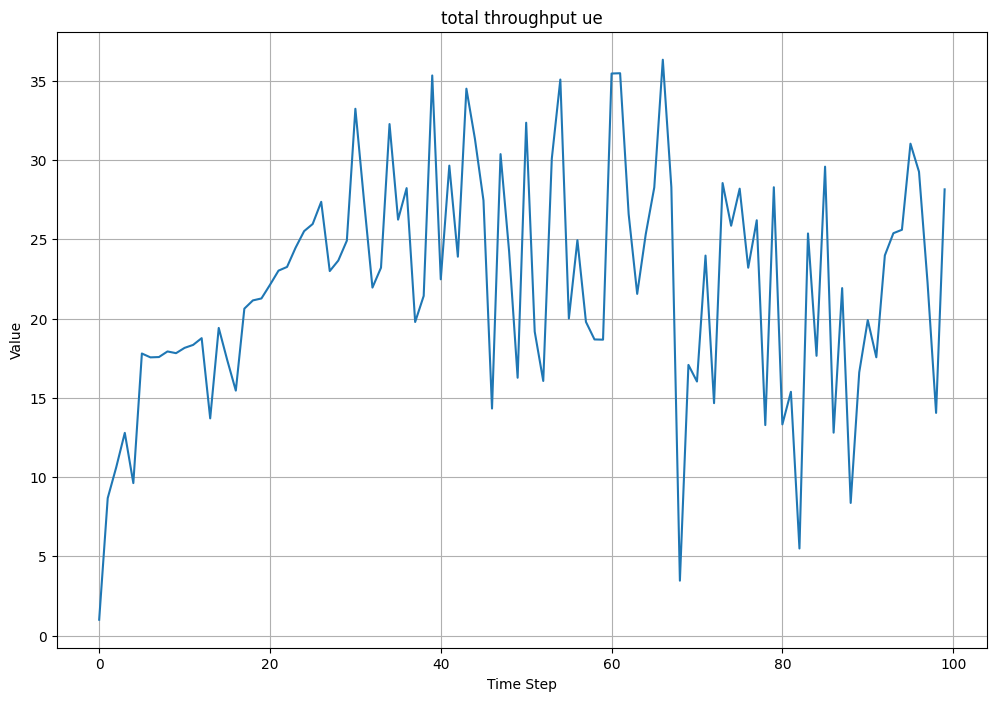

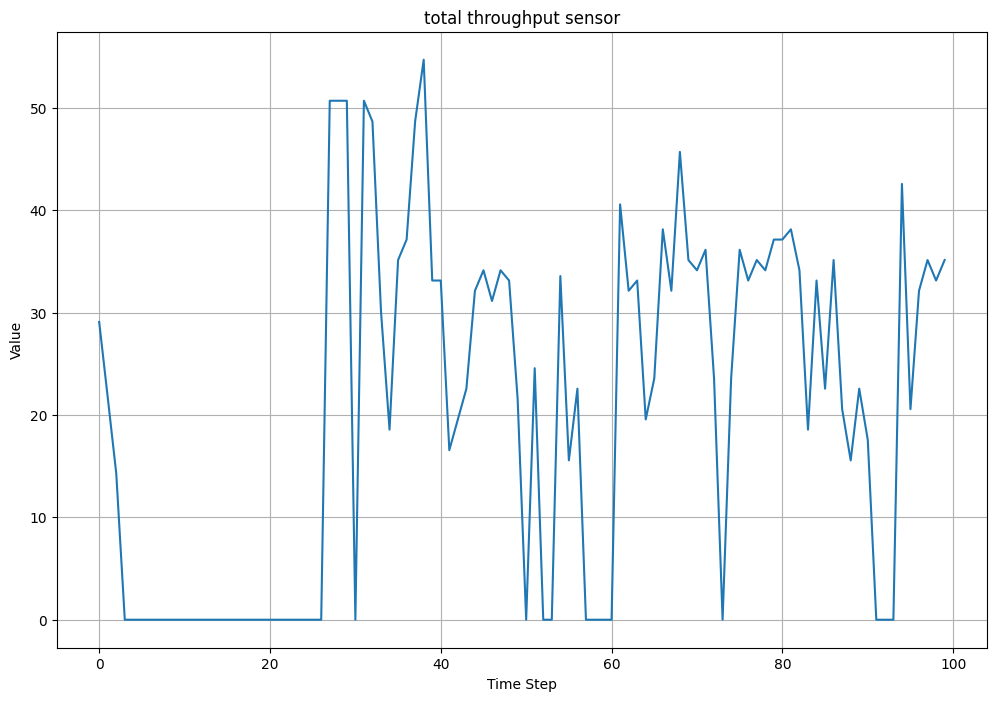

In [14]:
import matplotlib.pyplot as plt

def plot_kpi_metrics():
    # Plot kpi metrics
    for metric in kpi_results.columns:
        plt.figure(figsize=(12, 8))
        kpi_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_kpi_metrics()